In [1]:
import pandas as pd
import numpy as np
#import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import scikitplot as skplt


# I. Introduction

Describe the objective of this assignment. You can briefly state how you accompilsh it.

# II. Data


1. https://archive.ics.uci.edu/ml/datasets/covertype



In [2]:
col_names = ["Elevation","Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology" , "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"]

In [3]:
soil_list = list()
for i in range(1, 41):
    a = "Soil_Type" + str(i)
    soil_list.append(a)

In [4]:
Wilderness_Area = list()
for i in range(1, 5):
    a =  "Wilderness_Area" +str(i)
    Wilderness_Area.append(a)

In [5]:
col_names = col_names + Wilderness_Area + soil_list

In [6]:
col_names = col_names + ["Cover_Type"]

In [7]:
df = pd.read_csv(r"./covtype.data",sep="," ,names = col_names)

In [8]:
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [9]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


We can see that the there are negative values in the Vertical_Distance_To_Hydrology column

<AxesSubplot:xlabel='Elevation', ylabel='Cover_Type'>

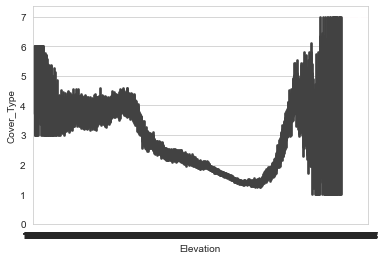

In [10]:
sns.set_style('whitegrid')
plt.figure()
sns.barplot(x = df['Elevation'], y = df['Cover_Type'])

The elevation changes according to the covertype. Therefore the elevation column is important

<AxesSubplot:xlabel='Aspect', ylabel='Cover_Type'>

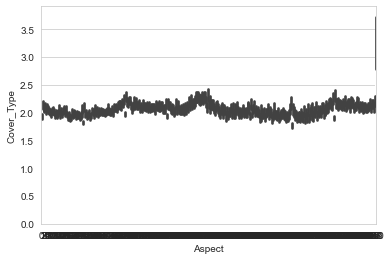

In [11]:
sns.set_style('whitegrid')
plt.figure()
sns.barplot(x = df['Aspect'], y = df['Cover_Type'])

The Aspect does not fluctuate according to the covertype

<AxesSubplot:xlabel='Slope', ylabel='Cover_Type'>

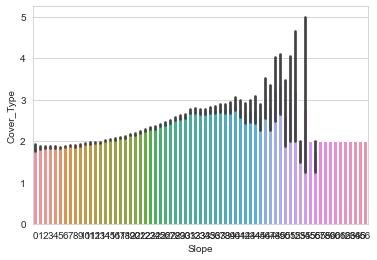

In [12]:
sns.set_style('whitegrid')
plt.figure()
sns.barplot(x = df['Slope'], y = df['Cover_Type'])

We can see that while majority of the data is centered towards the covertype Lodgepole Pine there are small spikes in the 3(Ponderosa Pine) and 4(Cottonwood/Willow)  

C:\Users\lingeswaren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cover_Type', ylabel='count'>

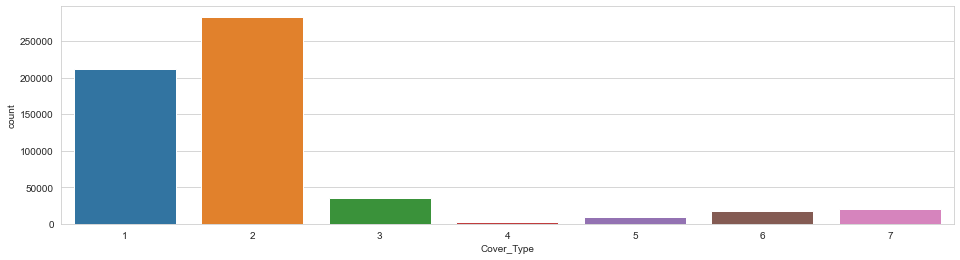

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize = (16,4))
sns.countplot(df['Cover_Type'])

We can see that the dataset has the maximum number of elements in  covertype two(Lodgepole Pine) and then one (Spruce/Fir).

C:\Users\lingeswaren\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


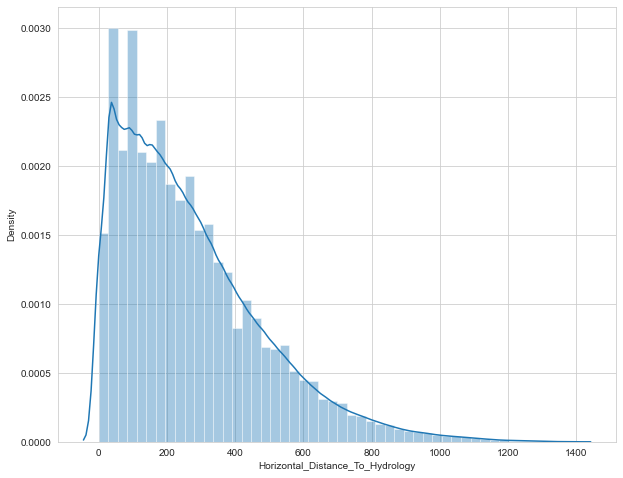

In [14]:
plt.figure(figsize = (10, 8))
sns.distplot(df['Horizontal_Distance_To_Hydrology'])
plt.show()

The horizontal distance to hydrology is skewed to the left.

C:\Users\lingeswaren\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


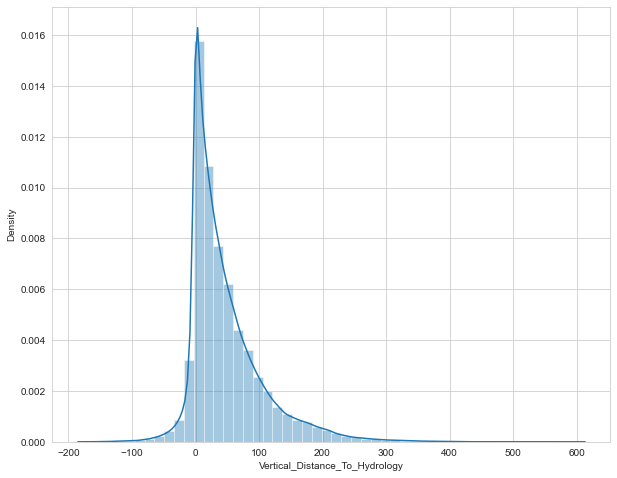

In [15]:
plt.figure(figsize = (10, 8))
sns.distplot(df['Vertical_Distance_To_Hydrology'])
plt.show()

The vertical distance to hydrology is left skewed with negetive values aswell.

Separating the Covertype for the y labels

In [16]:
y = np.asarray(df['Cover_Type'])
y = y.reshape(y.shape[0])
columns = df.columns.to_list()
columns.remove('Cover_Type')
x = np.asarray(df[columns])

Splitting the dataset into training and testing

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3,random_state=50)

Using the min max scaler for reducing the time taken by the code to run the svm

In [18]:
minmax_preprocess = MinMaxScaler(feature_range=(-1,1)).fit(x_train)
x_train = minmax_preprocess.transform(x_train)
x_test = minmax_preprocess.transform(x_test)

# III. Method

1. Implementation of both SVM and Kernel SVM and report the classification performance of the classifiers on the original dataset.
2. Used PCA to reduce the feature representation to a more compact version that may be of size: 10%, 15%, 20%, 25%, and 30% of the originial dataset dimension.


# SVM

The svm library is imported from the sklearns library.\
We then create an object of the svm.LinearSVC().\
Then we use the fit function to get the weights depending on the fit that we get from the training data.\
Finally we predict the testing dataset.

In [19]:
model =svm.LinearSVC()

In [20]:
model.fit(x_train, y_train)

C:\Users\lingeswaren\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [21]:
pred_y = model.predict(x_test)

In [22]:
accuracy_score(y_test, pred_y)

0.7137988801174958

In [23]:
f1_score(y_test, pred_y, average=None)

array([0.6958084 , 0.76709531, 0.72106495, 0.3264202 , 0.0279959 ,
       0.09183147, 0.58981731])

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

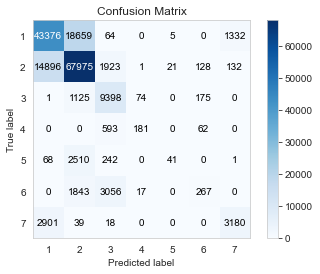

In [24]:
skplt.metrics.plot_confusion_matrix(y_test, pred_y)

# Kernel SVM

In the kernel SVM we specify a kernel for fitting the data and then we predict the testing dataset similar to the Linear SVM.\
The kernel used in for this project was radial basis funtion (rbf).

In [25]:
model = svm.SVC(kernel= "rbf")

In [26]:
model.fit(x_train, y_train)

SVC()

In [27]:
pred_y = model.predict(x_test)

In [28]:
accuracy_score(y_test, pred_y)

0.7713420231319993

In [29]:
f1_score(y_test, pred_y, average=None)

array([0.75471301, 0.81147453, 0.78054586, 0.3342416 , 0.15125516,
       0.41560119, 0.76267361])

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

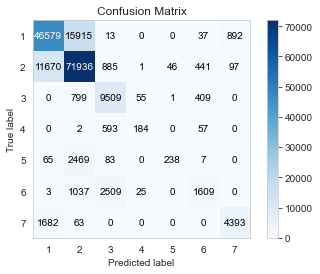

In [30]:
skplt.metrics.plot_confusion_matrix(y_test, pred_y)

# PCA

PCA is a dimesionality reduction technique.\
We first create an object of pca with the object variables equal to the number of components.\
Now based on the number of components we reduce the dimensionality of the data using transform function.\
We do this for both taining and ther testing data set


In [31]:
from sklearn.decomposition import PCA

In [32]:
pca_dim_red= PCA(n_components=54)

In [33]:
pca_dim_red.fit(x_train)

PCA(n_components=54)

In [34]:
Xtrain = pca_dim_red.transform(x_train)

In [35]:
Xtest = pca_dim_red.transform(x_test)

### SVM

Similar to the earlier method we initialte svm based on the dimensionality reduced data.

In [36]:
model =svm.LinearSVC()

model.fit(Xtrain, y_train)

LinearSVC()

In [37]:
pred_y = model.predict(Xtest)

In [38]:
accuracy_score(y_test, pred_y)

0.7137931430145034

In [39]:
f1_score(y_test, pred_y, average=None)

array([0.6958091 , 0.76710489, 0.72098822, 0.32461677, 0.0279959 ,
       0.09183147, 0.58981731])

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

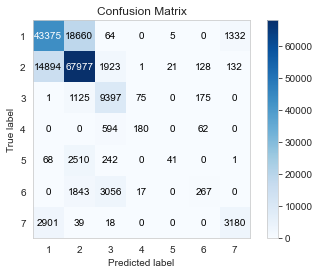

In [40]:
skplt.metrics.plot_confusion_matrix(y_test, pred_y)

### Kernel SVM

Similar to the earlier method we initialte Kernel SVM based on the dimensionality reduced data.

In [41]:
model = svm.SVC(kernel= "rbf", cache_size=7000)

In [42]:
model.fit(Xtrain, y_train)

SVC(cache_size=7000)

In [57]:
model.fit(Xtrain, y_train)

SVC(cache_size=7000)

In [58]:
pred_y = model.predict(Xtest)

In [59]:
accuracy_score(y_test, pred_y)

0.7872337984211493

In [64]:
f1_score(y_test, pred_y, average=None)

array([0.77013861, 0.82443554, 0.79794854, 0.51257097, 0.21205695,
       0.48099719, 0.78450236])

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

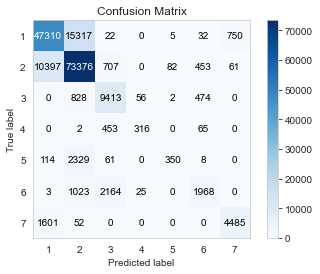

In [61]:
skplt.metrics.plot_confusion_matrix(y_test, pred_y)

# IV. Experiments
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

| Model      | Accuracy | F1 score     |
| :---        |    :----:   |          ---: |
| SVM      | 71.37%       | 0.69, 0.76, 0.72, 0.32 , 0.027 ,0.091, 0.58  |
| Kernel SVM  | 77.13%        | 0.75, 0.81 , 0.78, 0.334 , 0.151,0.41, 0.762     | 
| PCA SVM   | 71.37%        |   0.69 , 0.76, 0.72, 0.32, 0.027 ,0.091, 0.58 | 
| **PCA Kernel SVM**   |78.72%| 0.77, 0.82, 0.79, 0.51, 0.21,0.48, 0.78   | 

# Conclusions


From the data analysis we can conclude that many columns in the data has outliers and we are dealing with a skewed dataset.\
Additionally we use F1 score as the we are dealing with an unbalanced dataset(there are more number of covertype 2 and 1 than the others).\
Since the dataset is more skewed towards covertype 1 and 2 we will compare the f1 score according to them.\
The kernel based SVM works better than the other methods. with greater f1 score amongst all the classes in the covertype.\
Additionally PCA reduced the run time significantly and increased the F1 scores in the case of kernel based SVM.\
However we see a very small change in the case of linear svm


# References

1) https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

2) https://scikit-learn.org/stable/modules/svm.html

3) https://scikit-learn.org/stable/modules/multiclass.html

4) https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html